In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import torch
from torch import optim, nn
from math import exp

import numpy as np

from tqdm import tqdm
from random import randint

from load_dataset import load_dataset, plot_image, save_image
from auto_encoder2 import PAutoE

device = "cuda"

pimages = load_dataset().to(device)

In [28]:
T = 30
beta = torch.linspace(10e-4, 0.05, T)

alpha = 1 - beta

alpha_ = torch.zeros(T)

for i in range(T):
    alpha_[i] = torch.prod(alpha[0:i+1])

alpha_

tensor([0.9990, 0.9963, 0.9919, 0.9859, 0.9783, 0.9690, 0.9582, 0.9460, 0.9322,
        0.9171, 0.9007, 0.8831, 0.8643, 0.8444, 0.8236, 0.8019, 0.7794, 0.7563,
        0.7325, 0.7083, 0.6836, 0.6587, 0.6335, 0.6083, 0.5830, 0.5578, 0.5327,
        0.5079, 0.4834, 0.4592])

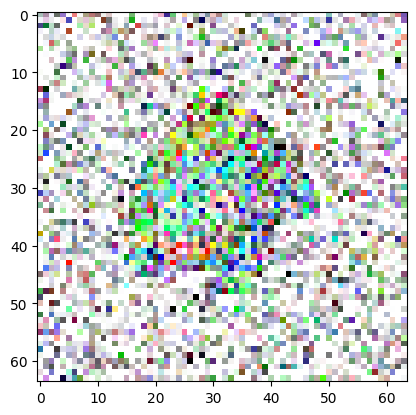

29
28


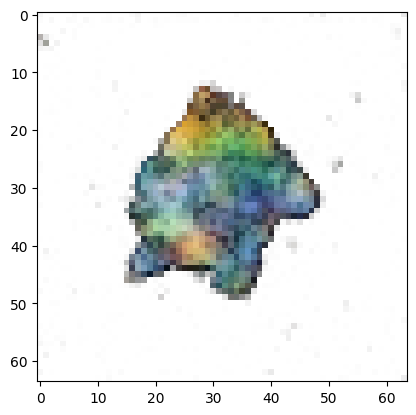

27
26


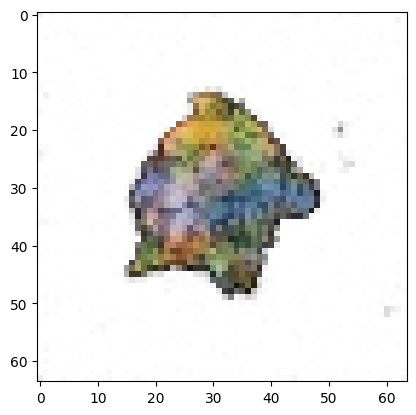

25
24


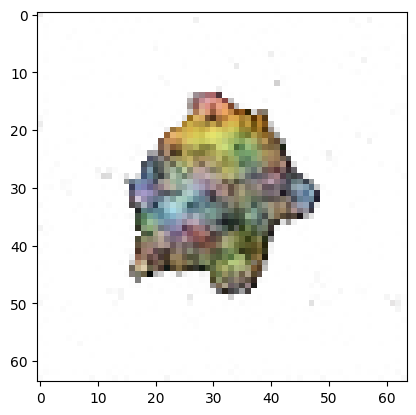

23
22


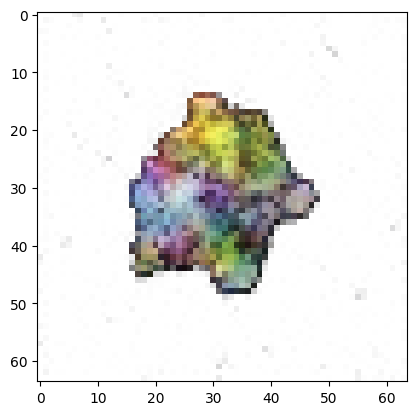

21
20


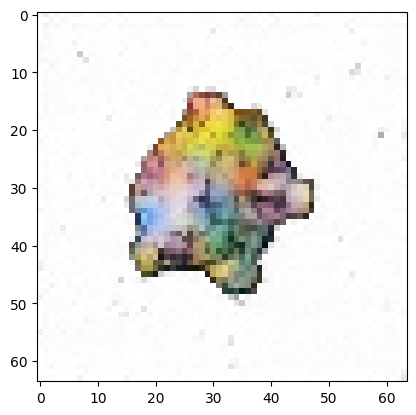

19
18


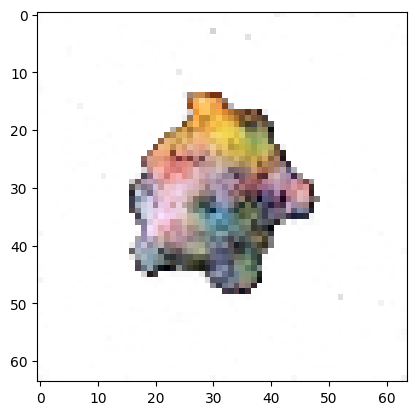

17
16


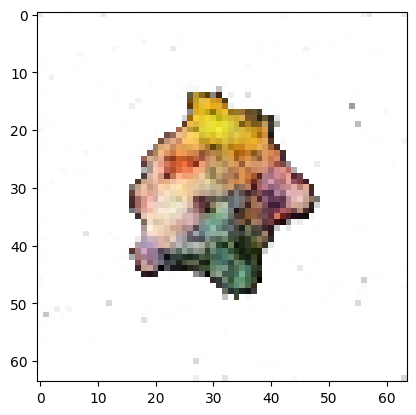

15
14


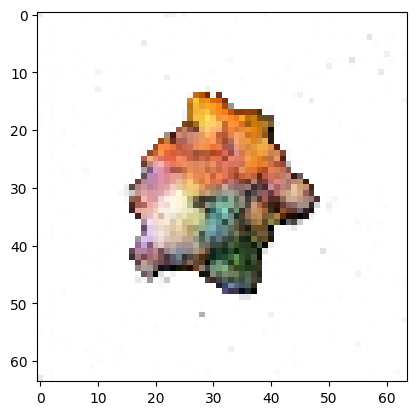

13
12


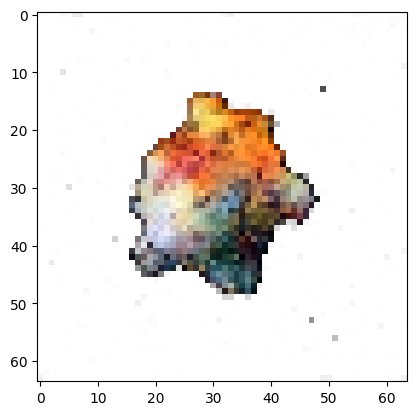

11
10


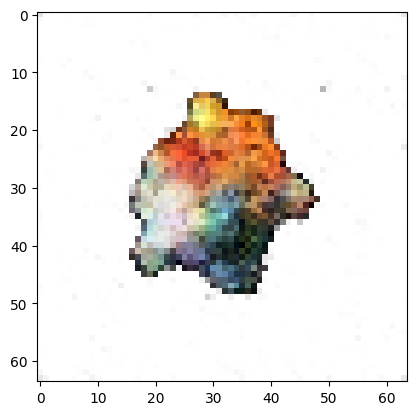

9
8


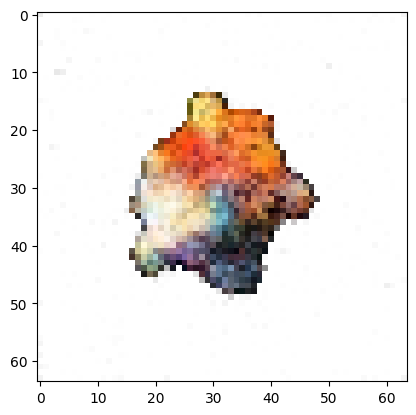

7
6


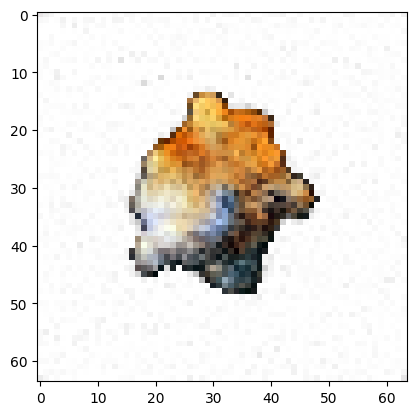

5
4


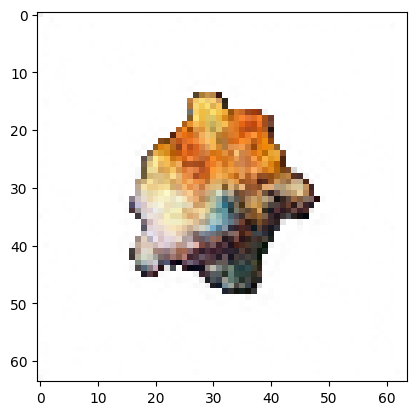

3
2


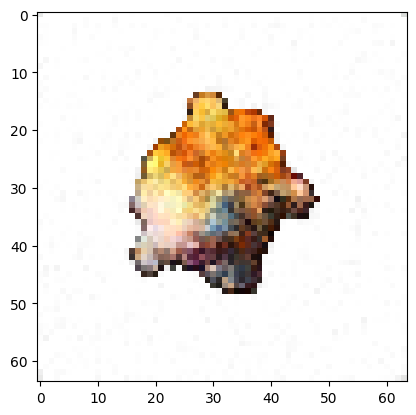

1
0


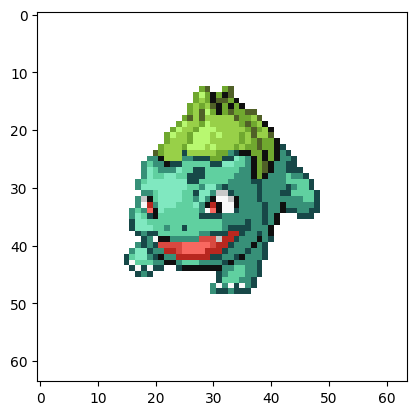

In [29]:
tt = 30

z = torch.randn((4,64,64), device=device)
x = torch.sqrt(alpha_[tt-1]) * pimages[0][0] + torch.sqrt(1-alpha_[tt-1]) * z

plot_image(x)

for t in reversed(range(tt)):
    
    print(t)

    if (t == 0):
        break

    model = torch.jit.load(f"./model_{t}.pt").eval().to(device)
    
    #z = torch.randn((4,64,64), device=device) 
    #e = model(x[None])[0] * (1 - alpha[t]) / torch.sqrt(1 - alpha_[t])
    #x = (1 / torch.sqrt(alpha[t])) * (x - e) + z * torch.sqrt(beta[t])
    
    z = torch.randn((4,64,64), device=device)
    x0 = model(x[None])[0]
    x = torch.sqrt(alpha_[t]) * x0 + torch.sqrt(1-alpha_[t]) * z

    if (t % 2) == 0:
        plot_image(x0)

plot_image(pimages[0][0])